In [1]:
import pandas as pd
import seaborn as sns
from pydataset import data
import numpy as np
import os
import scipy.stats as stats
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


#turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

import prepare
import wrangle
from env import get_db_url

In [2]:
df = pd.read_sql('SELECT * FROM customers', get_db_url('telco_churn'))

In [3]:
train_df, validate_df, test_df = prepare.prep_frame(df)


##########################################################################################################

In [4]:
single_df = prepare.single_house(train_df)

In [5]:
single_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet,online_security,...,family_house,single_head_house,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,paperless_billing_Yes,churn_Yes,ihs,ooss
2635,3748-FVMZZ,Male,0,No,No,4,No,0,1,0,...,False,False,1,0,0,0,1,0,2,1
3669,5176-LMJXE,Female,0,No,No,47,Yes,0,0,0,...,False,False,0,0,0,1,1,0,1,0
4374,6169-PGNCD,Female,0,No,No,57,Yes,0,1,1,...,False,False,0,0,0,1,1,0,3,4
4226,5961-VUSRV,Female,0,No,No,12,Yes,0,0,0,...,False,False,0,0,0,1,1,0,1,0
10,0017-DINOC,Male,0,No,No,54,No,0,1,1,...,False,False,1,0,0,0,0,0,2,2


In [6]:
dual_df = prepare.dual_house(train_df)

In [7]:
family_df = prepare.family_house(train_df)

In [8]:
single_head_house_df = prepare.single_head_house(train_df)

In [ ]:
train_df.head()

### Single exploration

exploring the relationship between in-hand-services and churn among single households

- H_0: ihs of single households who churn >= ihs of single households who do not churn
- H_a: ihs of single households who churn < ihs of single households who do not churn

<AxesSubplot:>

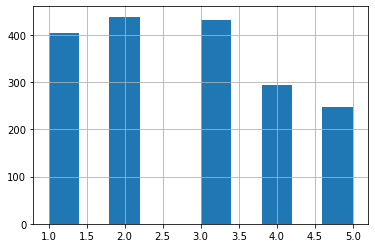

In [10]:
single_df.ihs.hist()

<AxesSubplot:>

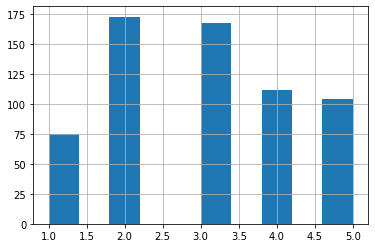

In [11]:
churn_sample_single = single_df[single_df.churn == 'Yes'].ihs

churn_sample_single.hist()

In [12]:
alpha = 0.5

In [13]:
single_df.churn.value_counts(normalize = True)

No     0.651022
Yes    0.348978
Name: churn, dtype: float64

In [14]:

churn_sample_single = single_df[single_df.churn == 'Yes'].ihs
overall_mean_single = single_df.ihs.mean()

t, p = stats.ttest_1samp(churn_sample_single, overall_mean_single)

print(t, p/2, alpha)

4.95310176548413 4.695016095398425e-07 0.5


In [15]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


by rejecting the null hypothesis, we affirm that among single households, those who churn have less in-hand-services than those who do not churn.

#### here we are comparing out of sight services of churn and not churn among single households

- H_0: ooss of those who churn >= ooss of those who do not churn among single households
- H_a: ooss of those who churn < ooss of those who do not churn among single households

In [16]:
churn_sample_single = single_df[single_df.churn == 'Yes'].ooss
overall_mean_single = single_df.ooss.mean()

t, p = stats.ttest_1samp(churn_sample_single, overall_mean_single)

print(t, p/2, alpha)

-7.2461334048109745 6.281569939547015e-13 0.5


In [17]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


<AxesSubplot:>

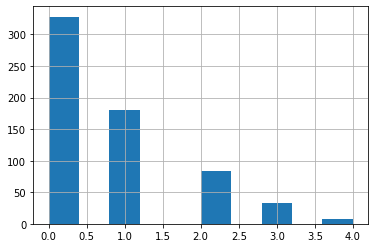

In [18]:
churn_sample_single = single_df[single_df.churn == 'Yes'].ooss

churn_sample_single.hist()

From this we can infer that people are more satisfied the more ooss they have

### Family Exploration

exploring the relationship between in-hand-services and churn among family households

- H_0 : ihs of family households who churn >= ihs of family households who do not churn
- H_a: ihs of family households who churn < ihs of family households who do not churn

<AxesSubplot:>

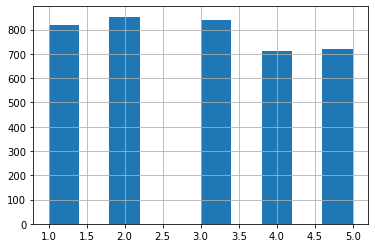

In [19]:
family_df.ihs.hist()

<AxesSubplot:>

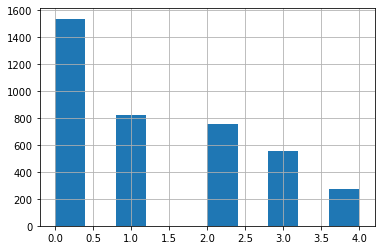

In [20]:
family_df.ooss.hist()

<AxesSubplot:>

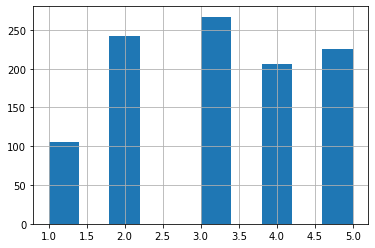

In [21]:
churn_sample_family = family_df[family_df.churn == 'Yes'].ihs

churn_sample_family.hist()

In [22]:
churn_sample_family = family_df[family_df.churn == 'Yes'].ihs
overall_mean_family = family_df.ihs.mean()

t, p = stats.ttest_1samp(churn_sample_family, overall_mean_family)

print(t, p/2, alpha)

7.134002822013183 9.096175575896955e-13 0.5


In [23]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


by failing to reject the null hypothesis, we recognize there is no relationship between churn and ihs among families

<AxesSubplot:>

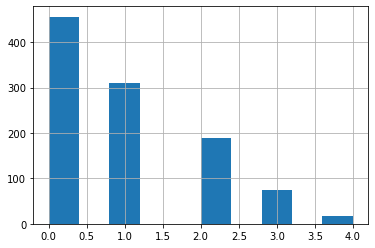

In [24]:
churn_sample_family = family_df[family_df.churn == 'Yes'].ooss

churn_sample_family.hist()

people tend to be more satisfied with more ooss

###############################################################################################################


In [25]:
train_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet,online_security,...,family_house,single_head_house,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,paperless_billing_Yes,churn_Yes,ihs,ooss
5310,7503-MIOGA,Female,1,Yes,No,72,Yes,1,1,1,...,False,False,0,1,0,1,1,0,5,4
3790,5329-KRDTM,Male,1,Yes,No,72,Yes,1,1,0,...,False,False,1,1,0,1,0,0,4,3
4398,6199-IWKGC,Female,1,Yes,No,46,Yes,1,1,0,...,False,False,0,1,0,1,0,0,5,1
2635,3748-FVMZZ,Male,0,No,No,4,No,0,1,0,...,False,False,1,0,0,0,1,0,2,1
2986,4280-DLSHD,Male,0,Yes,No,8,Yes,0,1,0,...,False,False,1,1,0,1,1,0,2,2


<AxesSubplot:>

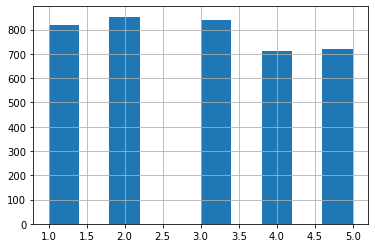

In [26]:
train_df.ihs.hist()

<AxesSubplot:>

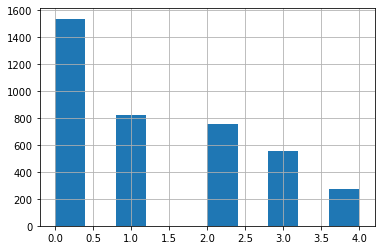

In [27]:
train_df.ooss.hist()

<AxesSubplot:>

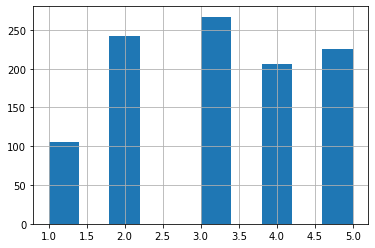

In [28]:
train_df[train_df.churn == 'Yes'].ihs.hist()

<AxesSubplot:>

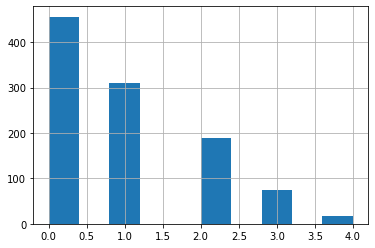

In [29]:
train_df[train_df.churn == 'Yes'].ooss.hist()

#### some chi-squared

In [51]:
observed = pd.crosstab(family_df.ooss, family_df.churn)
observed

churn,No,Yes
ooss,,
0,1081,456
1,508,311
2,570,188
3,480,74
4,258,17


In [52]:
#stats.chi2_contingency(observed)

In [53]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [54]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1081  456]
 [ 508  311]
 [ 570  188]
 [ 480   74]
 [ 258   17]]

Expected
[[1129  407]
 [ 601  217]
 [ 556  201]
 [ 407  146]
 [ 202   72]]

----
chi^2 = 171.6904
p     = 0.0000


In [42]:
observed2= pd.crosstab(train_df.ooss, family_df.tech_support)
observed2

tech_support,0,1
ooss,,
0,1537,0
1,692,127
2,425,333
3,134,420
4,0,275
